# Machine Learning Foundation

## Course 3, Part b: K-Nearest Neighbor LAB

## Introduction and Learning Goals

In this lab, we explore classification using the K-Nearest Neighbors approach. We use a customer churn dataset from the telecom industry which includes customer data, usage of long-distance, data usage, monthly revenue, type of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, include several Excel files which have been combined and are available in the course materials. We are using the subset of customers who have phone accounts. Since the data include a mix of numeric, categorical, and ordinal variables, we will load this data and do some preprocessing, then use K-nearest neighbors to predict customer churn rates.

After completing this lab, you should have a working understanding of how to preprocess a variety of variables in order to apply the K-Nearest Neighbors algorithm, understand how to choose K, and understand how to evaluate model performance.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns
data = pd.read_csv('data/Telco-Customer-Churn.csv', sep=',', na_values=' ')
sns.set_palette("Set2")

## Question 1

* We begin by importing the data. Examine the columns and data.
* Notice that the data contains a unique ID. We will not be using this feature, so it can be dropped from the data.
* Begin by taking an initial look at the data, including both numeric and non-numeric features.

In [2]:
df = data.drop(columns=['customerID'])
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum().sum()

0

In [3]:
round(df.describe(),2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.80,2283.30
std,0.37,24.55,30.09,2266.77
min,0.00,1.00,18.25,18.80
25%,0.00,9.00,35.59,401.45
50%,0.00,29.00,70.35,1397.48
75%,0.00,55.00,89.86,3794.74
max,1.00,72.00,118.75,8684.80


In [4]:
df.describe(include='object').T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


## Question 2

* Identify which variables are binary, categorical, and numeric.  The non-numeric features will need to be encoded using methods we have discussed in the course.
* Start by identifying the number of unique values each variable takes, then create list variables for categorical, numeric, and binary variables. 

In [5]:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], 
                          columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [6]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [7]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [8]:
[[i, list(df[i].unique())] for i in categorical_variables]

[['MultipleLines', ['No phone service', 'No', 'Yes']],
 ['InternetService', ['DSL', 'Fiber optic', 'No']],
 ['OnlineSecurity', ['No', 'Yes', 'No internet service']],
 ['OnlineBackup', ['Yes', 'No', 'No internet service']],
 ['DeviceProtection', ['No', 'Yes', 'No internet service']],
 ['TechSupport', ['No', 'Yes', 'No internet service']],
 ['StreamingTV', ['No', 'Yes', 'No internet service']],
 ['StreamingMovies', ['No', 'Yes', 'No internet service']],
 ['Contract', ['Month-to-month', 'One year', 'Two year']],
 ['PaymentMethod',
  ['Electronic check',
   'Mailed check',
   'Bank transfer (automatic)',
   'Credit card (automatic)']]]

In [9]:
numeric_variables = list(set(df.columns) - set(categorical_variables) - set(binary_variables))

array([[<AxesSubplot:title={'center':'TotalCharges'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'tenure'}>, <AxesSubplot:>]],
      dtype=object)

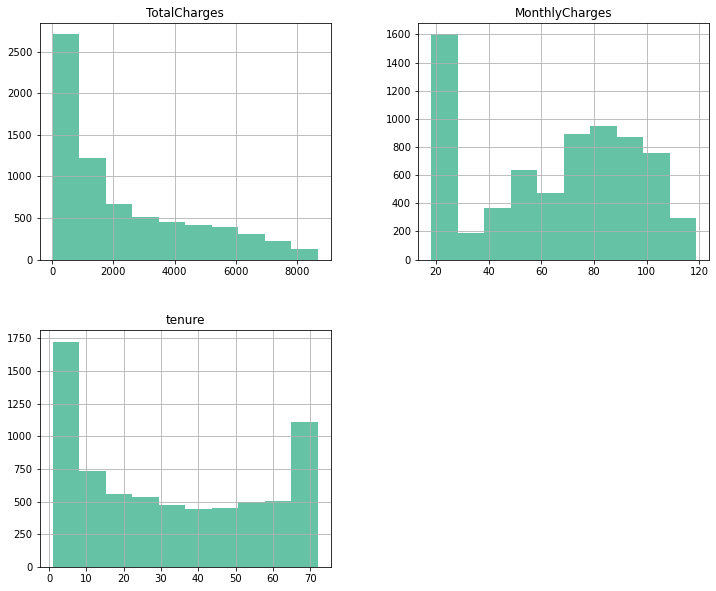

In [10]:
df[numeric_variables].hist(figsize=(12, 10))

## Question 3
* Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data. 
* Scale the data using one of the scaling methods discussed in the course.
* Save the processed dataframe as a comma-separated file: `churndata_processed.csv`

In [11]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [12]:
lb, le = LabelBinarizer(), LabelEncoder()

In [13]:
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [14]:
categorical_variables=df.select_dtypes(include='object').columns.to_list()
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

In [15]:
# Before scaling
df[numeric_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00


In [16]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
for column in numeric_variables:
    df[column] = mm.fit_transform(df[[column]])

# After scaling
df[numeric_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalCharges,7032.0,0.261309,0.261571,0.0,0.044155,0.159090,0.435719,1.0
MonthlyCharges,7032.0,0.463166,0.299363,0.0,0.172512,0.518408,0.712562,1.0
tenure,7032.0,0.442560,0.345708,0.0,0.112676,0.394366,0.760563,1.0


In [17]:
# Save a copy of the processed data for later use
outputfile = 'churndata_processed.csv'
df.to_csv(outputfile, index=False)

## Question 4
* Now that the data are encoded and scaled, separate the features (X) from the target (y, churn_value). 
* Split the sample into training and test samples, with the test sample representing 40% of observations.
* Estimate a K-Nearest Neighbors model, using K=3.
* Examine the Precision, Recall, F-1 Score, and Accuracy of the classification.
* Use a graphic to illustrate the Confusion Matrix 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [19]:
# Set up X and y variables
y, X = df['Churn'], df.drop(columns='Churn')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [20]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1528
           1       0.53      0.50      0.51       582

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.73      0.74      0.74      2110

Accuracy score:  0.74
F1 Score:  0.51


Text(0.5, 87.0, 'Churn Prediction')

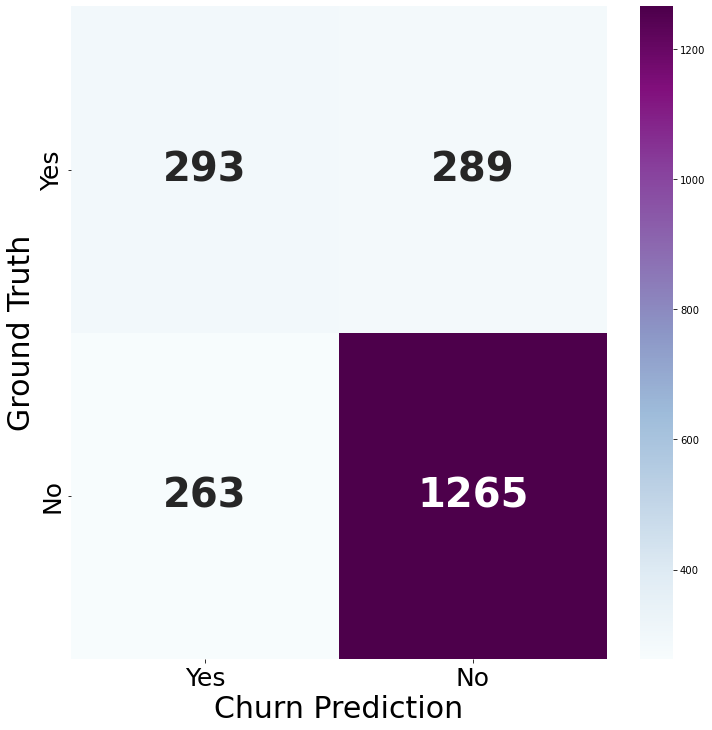

In [21]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred, labels=[1,0]), annot=True, fmt='d', cmap='BuPu', 
                 annot_kws={"size": 40, "weight": "bold"})  
labels = ['Yes', 'No']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Ground Truth', fontsize=30);
ax.set_xlabel('Churn Prediction', fontsize=30)

## Question 5
* Using the same split of training and test samples, estimate another K-Nearest Neighbors model
* This time, use K=5 and weight the results by distance
* Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix. 

In [22]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1528
           1       0.56      0.50      0.53       582

    accuracy                           0.75      2110
   macro avg       0.69      0.67      0.68      2110
weighted avg       0.75      0.75      0.75      2110

Accuracy score:  0.75
F1 Score:  0.53


Text(0.5, 87.0, 'Predicted Churn')

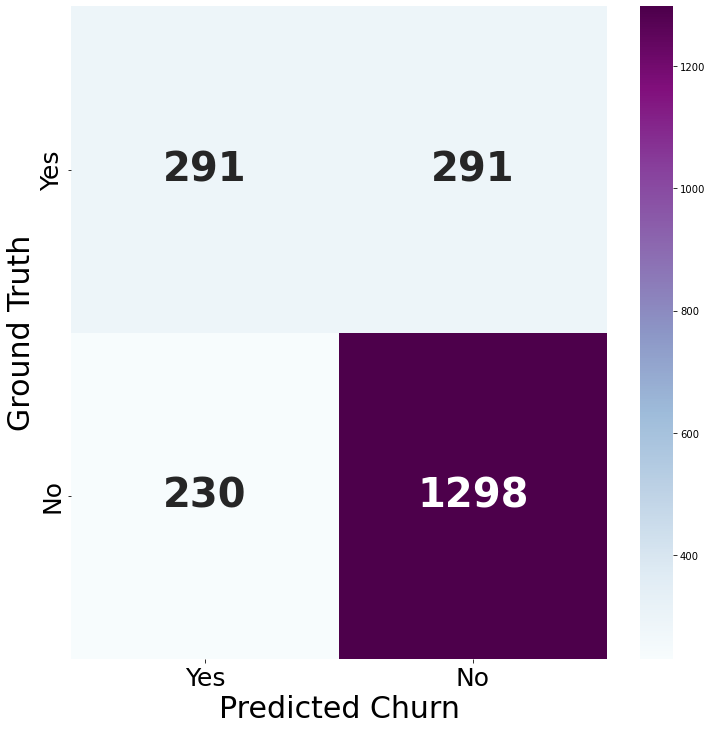

In [23]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred, labels=[1,0]), annot=True, fmt='d', cmap='BuPu', 
                 annot_kws={"size": 40, "weight": "bold"})  
labels = ['Yes', 'No']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels, fontsize=25)
ax.set_ylabel('Ground Truth', fontsize=30)
ax.set_xlabel('Predicted Churn', fontsize=30)

## Question 6
* To determine the right value for K, examing results for values of K from 1 to 40.
* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy)
* Generate charts which plot each of these measures as a function of K. 
* What do these charts suggest about the optimal value for K?

In [24]:
max_k = 30
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

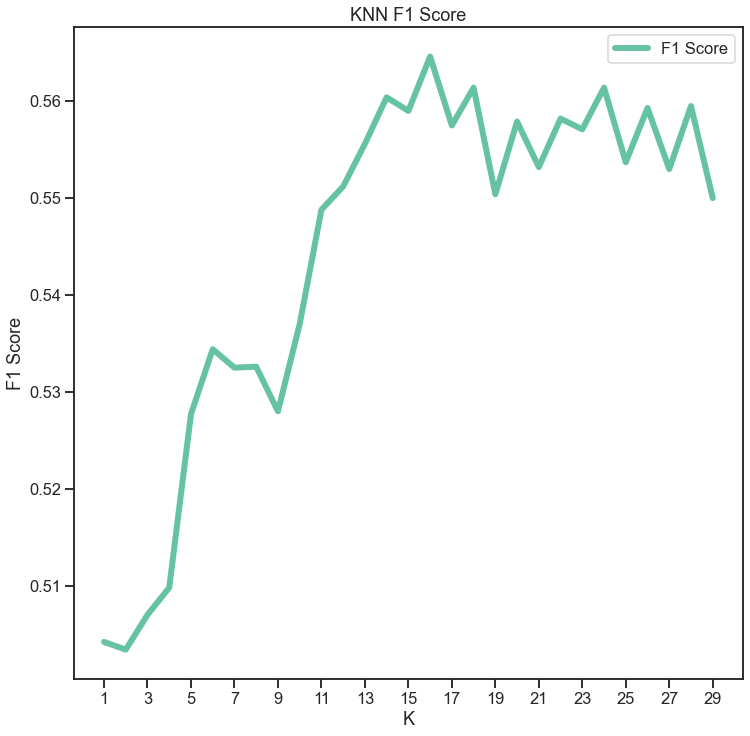

In [25]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.show()

This graph shows the KNN model reaches the best F1 score and then begins to plateau at around 16 neighbors.

<Figure size 1800x1200 with 0 Axes>

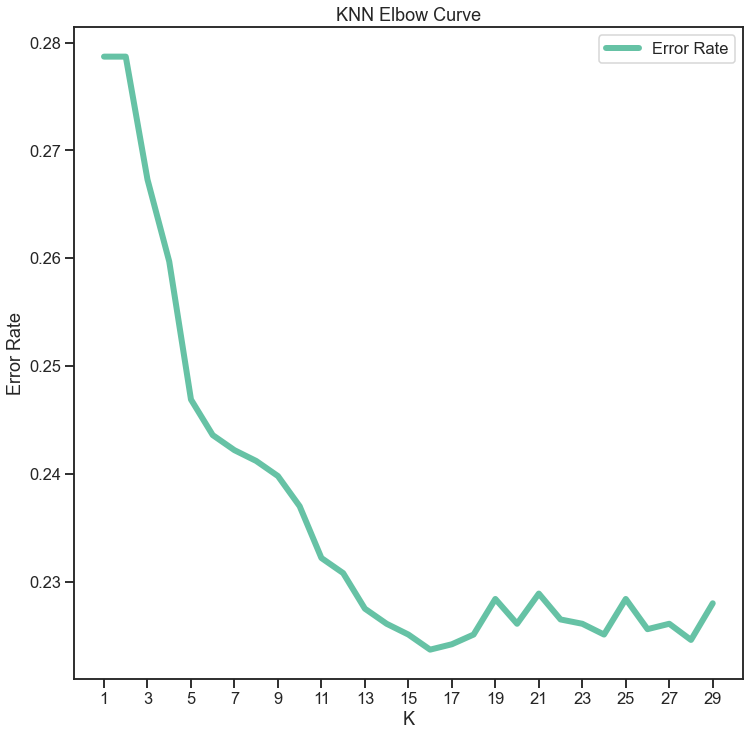

In [26]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.show()

This graph shows the lowest error occurs when k = 16.

---
### Machine Learning Foundation (C) 2020 IBM Corporation